### Hand written digits recognization
##### For training we will use MNIST dataset from keras
##### We will train an CNN network with 3 convolution layers
##### Finally we will test the model with hand written test data
The dataset used for testing can be downloaded from here: 
https://drive.google.com/drive/folders/1baxlrtmERe5FPhdQWj-W-k8tBvmvRjrN?usp=drive_link

In [271]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

In [272]:
# Load dataset
mnist = tf.keras.datasets.mnist

In [273]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [309]:
type(X_train)

numpy.ndarray

In [274]:
# Check the dimensions and type of the input 

print("Dimension: ", X_train[0].shape )
print("Type: ", type(X_train[0]))

Dimension:  (28, 28)
Type:  <class 'numpy.ndarray'>


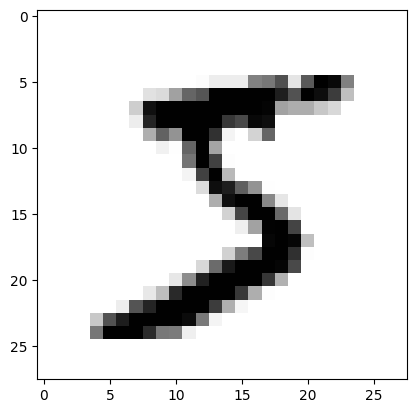

In [275]:
# We will use imshow to plot and visualize the numpy array

plt.imshow(X_train[0], cmap=plt.cm.binary) # We will stick with gray scale images

In [276]:
y_train[0]

5

In [277]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We need to standardize the input array for better and faster convergence of the model

In [278]:
X_train = X_train/255
X_test = X_test/255

In [279]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [280]:
# Resize the input image to apply convolution operation (increase the dimension)

IMG_SIZE = 28
X_train = np.array(X_train).reshape(-1, IMG_SIZE,IMG_SIZE, 1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE,IMG_SIZE, 1)

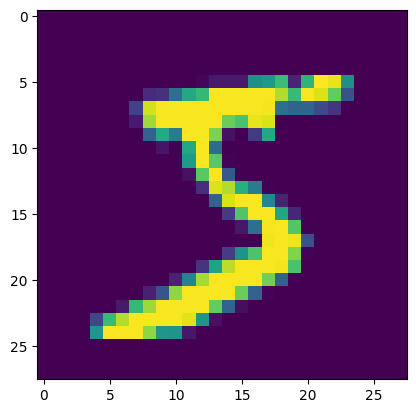

In [281]:
plt.imshow(X_train[0])

In [299]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

model.summary()

f:\Programming\Python\Handwritten digit recognition\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [300]:
model.compile(
    loss="sparse_categorical_crossentropy", # multi class classification
    metrics = ["accuracy"],
    optimizer = "adam"
)

In [284]:
X_train[0].shape

(28, 28, 1)

In [301]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8914 - loss: 0.3410 - val_accuracy: 0.9844 - val_loss: 0.0522
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9854 - loss: 0.0479 - val_accuracy: 0.9851 - val_loss: 0.0429
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9897 - loss: 0.0326 - val_accuracy: 0.9892 - val_loss: 0.0335
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9930 - loss: 0.0213 - val_accuracy: 0.9864 - val_loss: 0.0441
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9943 - loss: 0.0183 - val_accuracy: 0.9897 - val_loss: 0.0346
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9947 - loss: 0.0166 - val_accuracy: 0.9903 - val_loss: 0.0312
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9964 - loss: 0.0108 - val_accuracy: 0.9907 - val_loss: 0.0362
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9967 - loss: 0.0096 - 

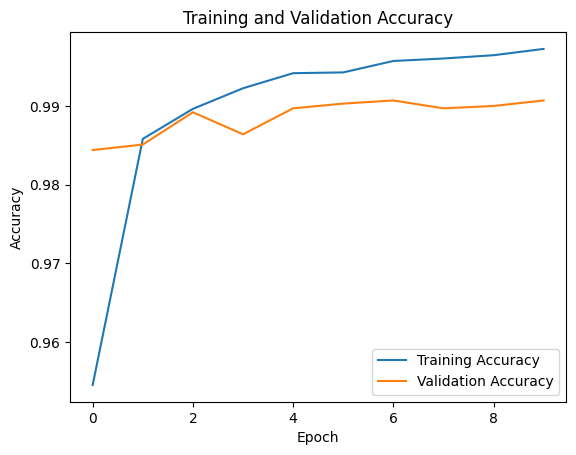

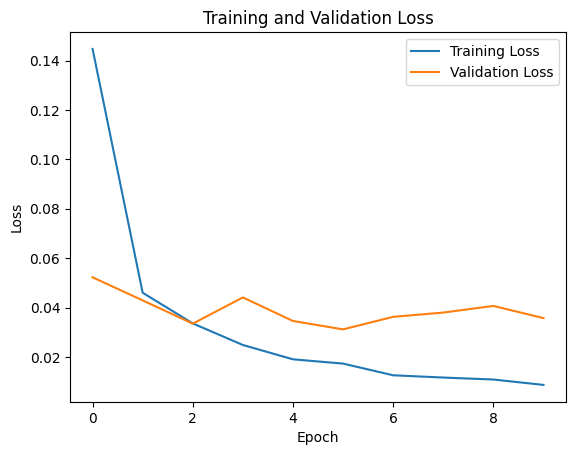

In [302]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [303]:
model.save("my_model.h5")

#### Test the model with hand written digits
#### Evaluation metrics used:

- Precision
- Recall
- F2 Score
- Confusion matrix

Steps for pre-processing

        - Convert the images to gray scale
        - Normalize the images

In [323]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28, 28))  # Resize the image to 28x28 pixels
    img = img / 255.0
    plt.imshow(img)
    plt.show()
    img_reshaped = img.reshape(-1, 28, 28, 1)
    return img_reshaped

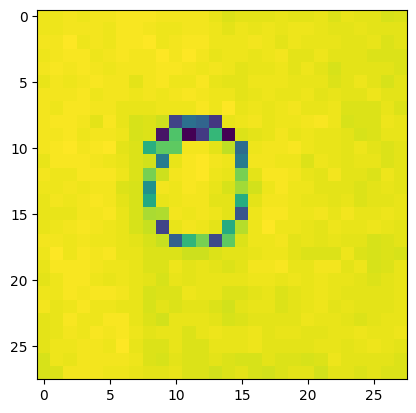

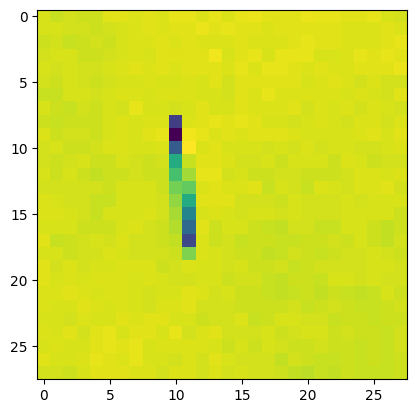

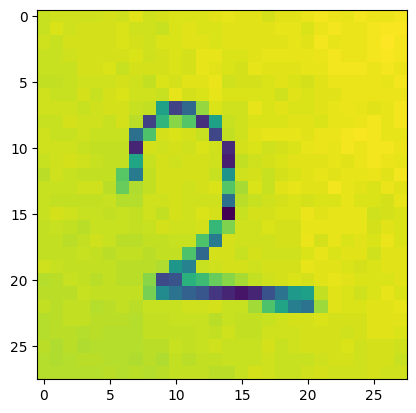

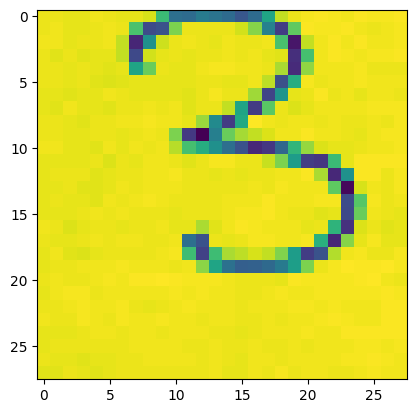

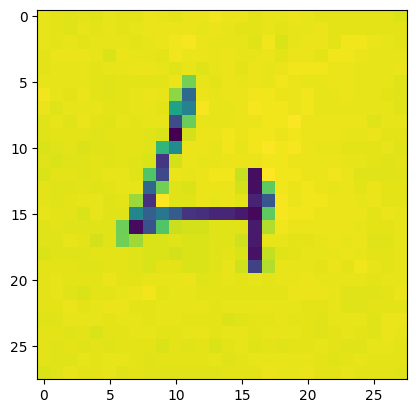

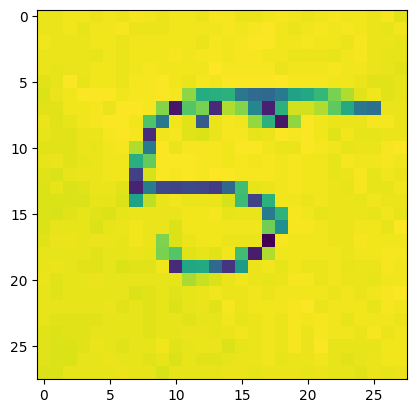

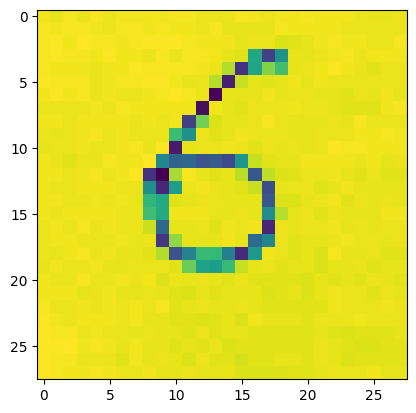

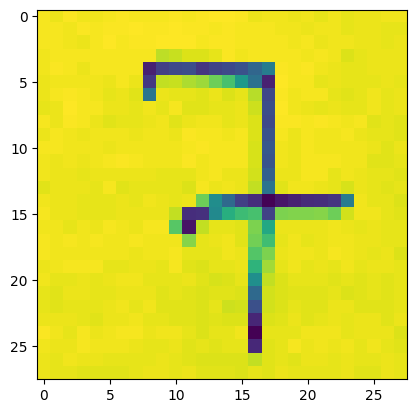

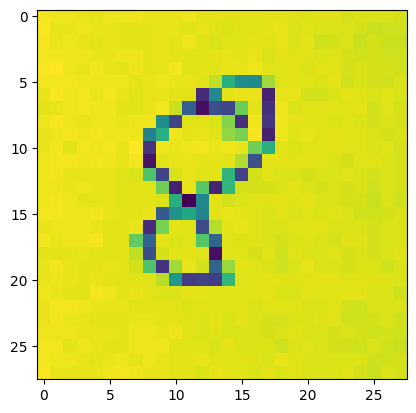

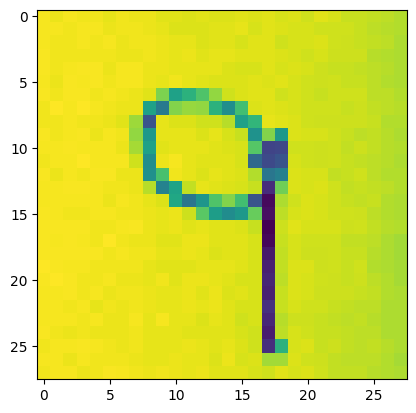

In [369]:
input_images = []
image_labels = []

for image in os.listdir("./test_data/"):
    img = preprocess_image(f"./test_data/{image}")
    input_images.append(img)
    image_char = image.split(".")[0]
    image_labels.append(int(image_char))

In [327]:
input_images[21].shape

(1, 28, 28, 1)

In [328]:
image_labels[21]

1

In [365]:
y_pred = []

for test_image in input_images:
    pred = model.predict(test_image)
    y_pred.append(np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [336]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, fbeta_score
import seaborn as sns

In [366]:
cm = confusion_matrix(image_labels, y_pred=y_pred)


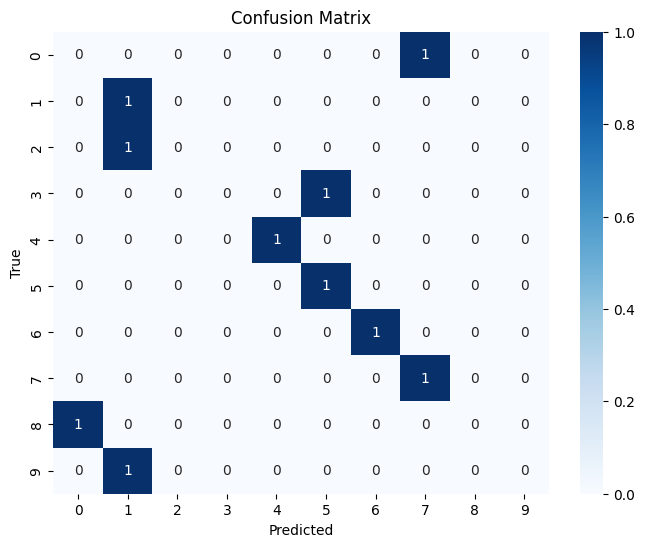

In [367]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [368]:
recall = recall_score(image_labels, y_pred, average='macro')
precision = precision_score(image_labels, y_pred, average='macro')
f2_score = fbeta_score(image_labels, y_pred, beta=2, average='macro')

print("Recall:", recall)
print("Precision:", precision)
print("F2 Score:", f2_score)

Recall: 0.5
Precision: 0.33333333333333337
F2 Score: 0.43809523809523815


f:\Programming\Python\Handwritten digit recognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Inference

The model was able to correctly able to predict the classes 2,4,5,6,7,8.

- Recall: A recall of 0.5 indicates that the model correctly identifies 50% of the positive cases. This means that half of the actual positive instances are being detected by the model.

- Precision: A precision of 0.33 means that out of all the predicted positive cases, only about one-third are actually true positives. In other words, there's a higher chance of false positives.

- F2 Score: The F2 score balances precision and recall, giving more weight to recall. A score of 0.44 suggests moderate performance, prioritizing recall while considering precision

In inference, we can say that the model's performance is somewhat decent. It's capturing a reasonable portion of the actual positive cases (recall) but may also be making some false positive predictions